# Analysis of Cepheid Variables

 Matric: 2663452m

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.stats
import scipy.special
import scipy.integrate
import scipy.interpolate
from scipy import constants as consts
import cepheid_variables_functions as cv
import os

title_size = 16
axis_size = 13
markersize = 4
linewidth = 1.5


## Aim

The aim of this experiment was to analyse data of the apparent magnitude of Cepheid Variable stars to determine a Period-Luminosity relationship.

## Introduction

Cepheid Variable Stars are a class of pulsating supergiants, which can be used to measure distances, as they are intrinsically bright. They are useful for this as there exists a relationship between their period (the time it takes for the star to complete one cycle of pulsation) and their luminosity. Which allows the absolute magnitude of a distant Cepheid to be determined.
The relationship to be determined in this experiemnt is:
(equation 1) 
$$ log_{10}\left(\frac{\bar{L}}{L_{solar}}\right) = alog_{10}P+b $$

Where $\bar{L}$ is the average luminosity of the Cepheid, $L_{solar}$ is the luminosity of the Sun, $P$ is the period of the Cepheid,, and $a$ and $b$ are constants.
Or Alternatively in terms of the absolute magnitude:
(equation 2)
$$ \bar{M_V} = Alog_{10}P+B $$
Where $A$ and $B$ are constants, and $\bar{M_V}$ is the absolute magnitude of the Cepheid.

Useful Equations Given in the Lab Script:

(equation 3)
$$m_{V}^{model} = m_{V0} + m_V\sin\left(\frac{2{\pi}t}{P} + \phi\right)$$
Where $m_{V0}$ is the mean magnitude of the Cepheid, $m_V$ is the amplitude of the Cepheid, $t$ is the time, $P$ is the period of the Cepheid, and $\phi$ is the phase of the Cepheid.

(equation 4)
$$\Chi^2 = \sum_{i=1}^{N}\frac{\left(m_{Vi}-m_{Vi}^{model}\right)^2}{\sigma^2}$$
Where $\sigma$ is the standard deviation of the data, and $N$ is the number of data points.

(equation 5)
$$m_V = M_V + 5log_{10}\left({d}\right)-5$$
Where $M_V$ is the apparent magnitude of the Cepheid and $d$ is the distance to the Cepheid.

(equation 6)
$$m_V = M_V + 5log_{10}\left({d}\right)-5 +A_V$$
Where $A_V$ is the extinction coefficient.

### Task 1.1
In the first task we were required to load in the data for one of the stars, and plot the visual magnitude as a function of time, with a standard error of $\pm0.16$ on the apparent magnitude. This was done with use of numpy and matplotlib.

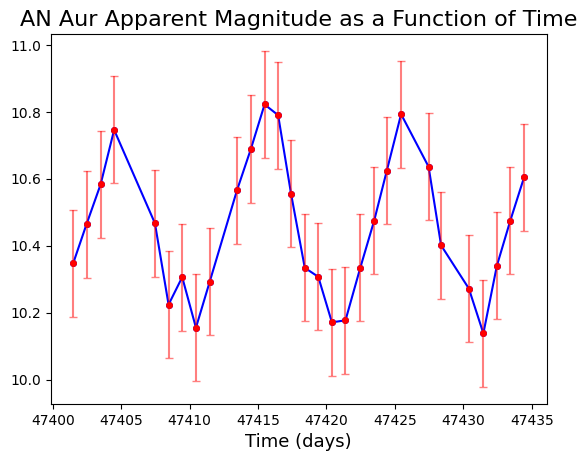

In [3]:
entries  = os.scandir('data_files/')
AN_Aur = np.loadtxt('data_files/AN_Aur_p.dat', unpack = True, usecols = [0,1])

plt.figure()
plt.plot(AN_Aur[0],AN_Aur[1],'o-', color = 'blue', markersize = markersize , linewidth = linewidth)
plt.title('AN Aur Apparent Magnitude as a Function of Time',  fontsize = title_size)
plt.xlabel('Time (days)', fontsize = axis_size)
markers, caps, bars = plt.errorbar(AN_Aur[0],AN_Aur[1], yerr = 0.16, fmt = 'o', color = 'red', markersize = markersize , linewidth = linewidth, capsize = 3)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
plt.show()

AN_Aur_time = AN_Aur[0]
AN_Aur_mag = AN_Aur[1]

From the Graph above we can see that there is a sinusoidal variation in the apparent magnitude of thee cepheid as a function of time. Due to the pulsating nature of the star

### Task 1.2
Next we were required to detrmine the power of the star and plot this against time to determine a power spectrum for a single star. This was done with the use of the provided cepheids_variable_functions.py file which contains a function that taes three parameters (the time, magnitude and variation of periods to test for each star) and returns the power of the star. This was done for a range of periods from 3 to 28 days with 101 steps. This calculated power was then plotted against the period of the star. Along with the associated errors.

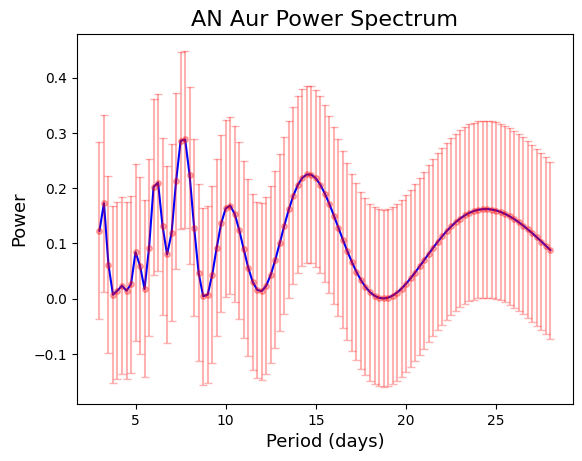

In [4]:
periods = np.linspace(3,28,101)
relative_time = AN_Aur_time - AN_Aur_time[0]
power = cv.powerSpectrum(relative_time, AN_Aur_mag, periods)

plt.figure()
plt.plot(periods, power, color = 'blue', linewidth = linewidth)
plt.title('AN Aur Power Spectrum',  fontsize = title_size)
plt.xlabel('Period (days)', fontsize = axis_size)
plt.errorbar(periods, power, yerr = 0.16, fmt = 'o', color = 'red', markersize = markersize , linewidth = linewidth, capsize = 3, alpha = 0.3)
plt.ylabel('Power', fontsize = axis_size)
plt.show()


Above we can see that the power spectrum for the first star has multiple peaks at different periods.  Each peak is a potential period candidate for the star. To determine the true period of pulsation for each star we will be required to do a least squares fit. However, before we can do that we need an array of these potential period candidates for each star.

### Task 1.3

In this task we load all the data for each of the 18 stars, and using the scipy.signal.find_peaks function to fond the x axis value for each of the peaks on the graph, and save this data to the variable peaks_periods. 

In [5]:
from scipy.signal import find_peaks
peaks_indices, _ = find_peaks(power, distance=5)
peaks_periods = periods[peaks_indices]

In [6]:
import os
path = 'data_files/'
file_list = [f for f in sorted(os.listdir(path))
             if f.endswith('.dat')]

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    print(f'Star {file}, With potential periods {peaks_periods} in days')

    
    

Star AN_Aur_p.dat, With potential periods [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ] in days
Star CH_Cas_p.dat, With potential periods [ 3.5   5.    7.25 10.   15.   26.25] in days
Star ER_Aur_p.dat, With potential periods [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ] in days
Star FM_Aql_p.dat, With potential periods [ 3.25  4.75  7.    9.5  13.   21.5 ] in days
Star GV_Aur_p.dat, With potential periods [ 4.25  5.5   7.75 13.25] in days
Star IN_Aur_p.dat, With potential periods [ 4.25  5.5   8.   13.5 ] in days
Star KK_Cas_p.dat, With potential periods [ 3.5   5.25  6.75  9.5  14.   23.5 ] in days
Star RS_Cas_p.dat, With potential periods [ 3.5   4.75  7.25 17.  ] in days
Star RX_Aur_p.dat, With potential periods [ 3.5   5.    6.25  7.75 11.5  22.25] in days
Star RY_Cas_p.dat, With potential periods [ 3.5   6.25  7.75 10.   15.25 23.75] in days
Star SW_Cas_p.dat, With potential periods [ 3.5   4.75  7.25 18.25] in days
Star SY_Aur_p.dat, With potential periods [ 3.25  4.75  6.    8.5  1

AN_Aur_p.dat, Lowest Chi Value = 0.10058671072637884, Corresponding period that gives the lowest Chi value = 10.378319228389598, Correspondiong apparent visual magnitude = 10.467511684214113


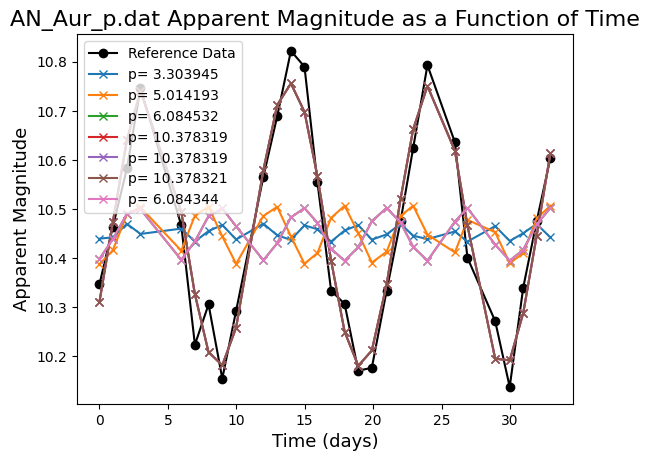

CH_Cas_p.dat, Lowest Chi Value = 0.5156812386758237, Corresponding period that gives the lowest Chi value = 15.008678180766601, Correspondiong apparent visual magnitude = 11.043929066235632


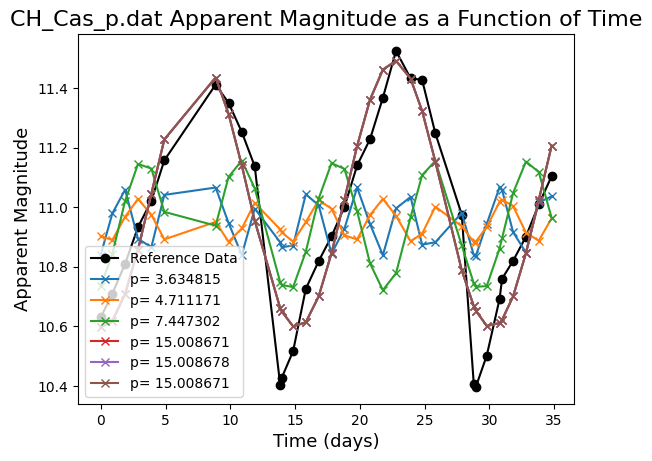

ER_Aur_p.dat, Lowest Chi Value = 0.48918397218808685, Corresponding period that gives the lowest Chi value = 15.64636718114442, Correspondiong apparent visual magnitude = 11.537648990972484


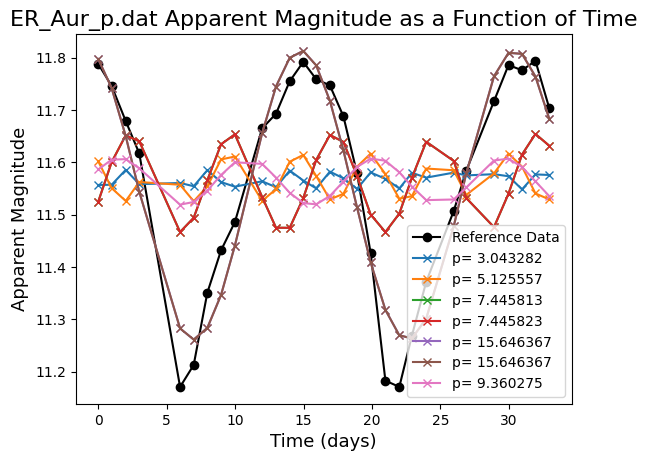

FM_Aql_p.dat, Lowest Chi Value = 1.4636156920538632, Corresponding period that gives the lowest Chi value = 4.692081114328498, Correspondiong apparent visual magnitude = 8.305202444022255


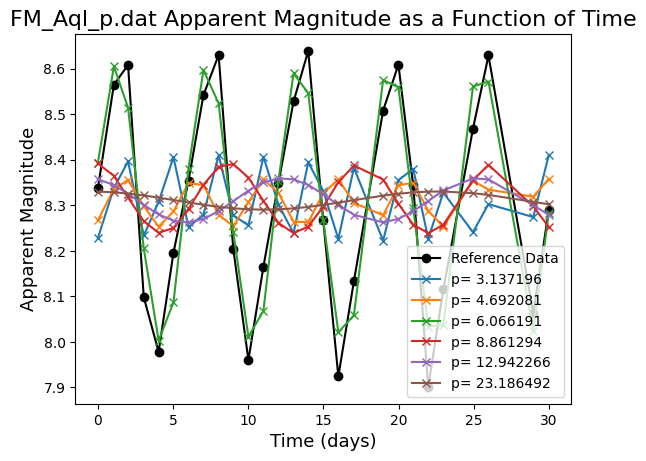

GV_Aur_p.dat, Lowest Chi Value = 0.8512470704411714, Corresponding period that gives the lowest Chi value = 5.200409775768486, Correspondiong apparent visual magnitude = 12.092205070378533


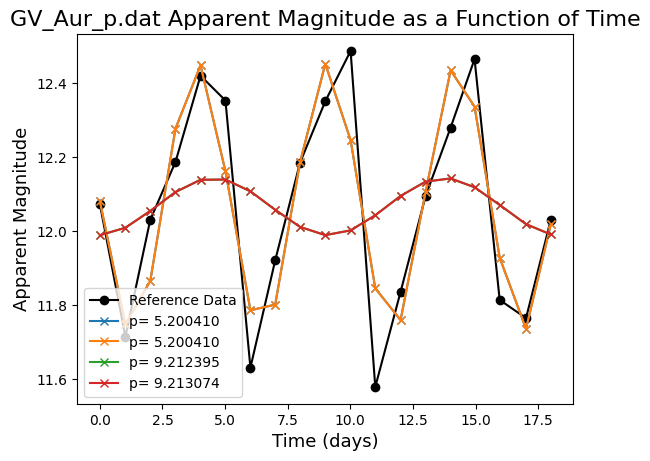

IN_Aur_p.dat, Lowest Chi Value = 0.6435330974981335, Corresponding period that gives the lowest Chi value = 11.52792805500797, Correspondiong apparent visual magnitude = 13.843119178836965


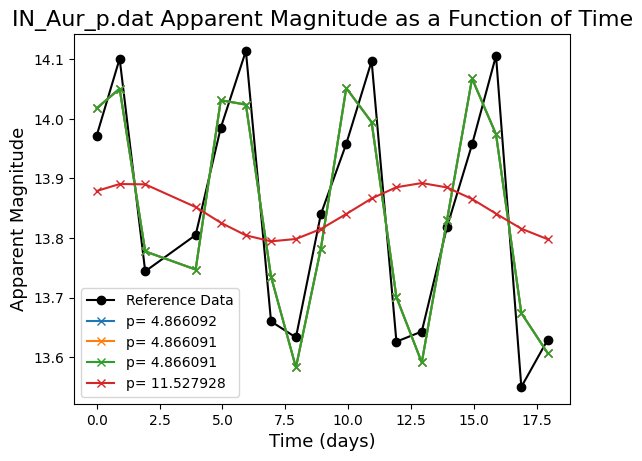

KK_Cas_p.dat, Lowest Chi Value = 1.1914656393619771, Corresponding period that gives the lowest Chi value = 5.252681575862268, Correspondiong apparent visual magnitude = 11.933978418795746


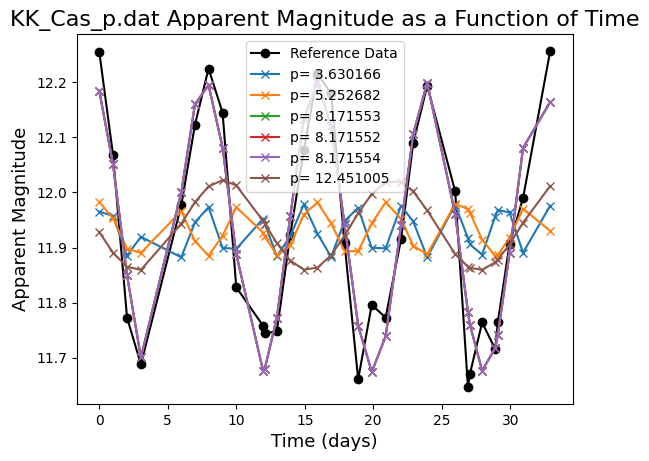

RS_Cas_p.dat, Lowest Chi Value = 1.2376432507140005, Corresponding period that gives the lowest Chi value = 3.514266376726082, Correspondiong apparent visual magnitude = 9.912943771374902


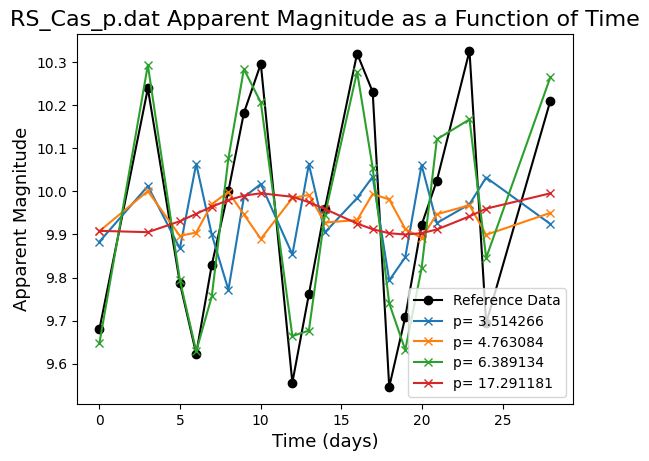

RX_Aur_p.dat, Lowest Chi Value = 0.0653503528418296, Corresponding period that gives the lowest Chi value = 11.63353391362709, Correspondiong apparent visual magnitude = 7.693879986274811


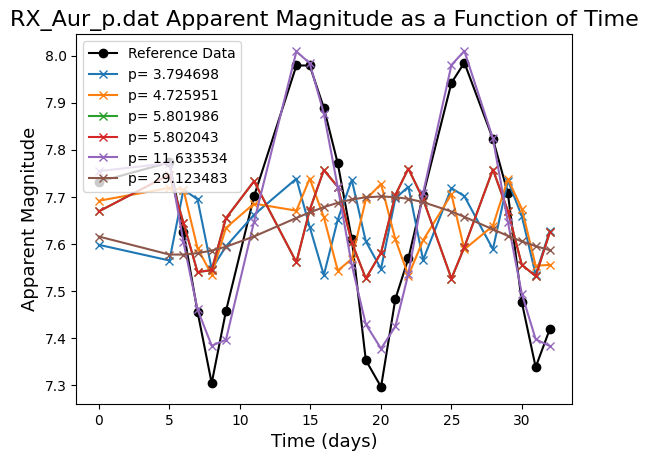

RY_Cas_p.dat, Lowest Chi Value = 3.1613643588337133, Corresponding period that gives the lowest Chi value = 23.43580159126738, Correspondiong apparent visual magnitude = 9.9773041315735


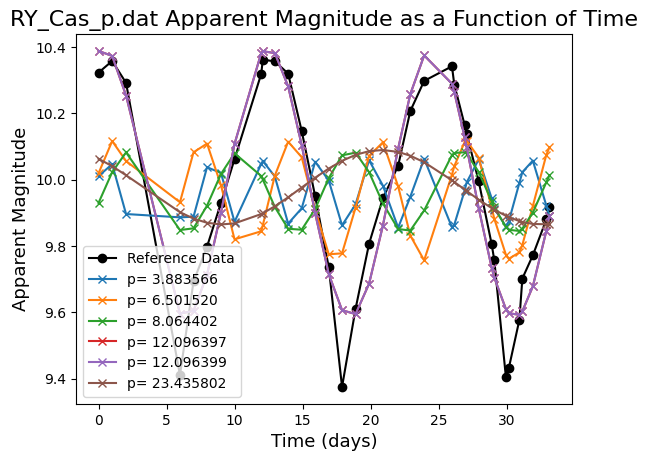

SW_Cas_p.dat, Lowest Chi Value = 0.6525453702257897, Corresponding period that gives the lowest Chi value = 7.629250670679741, Correspondiong apparent visual magnitude = 9.801468852069215


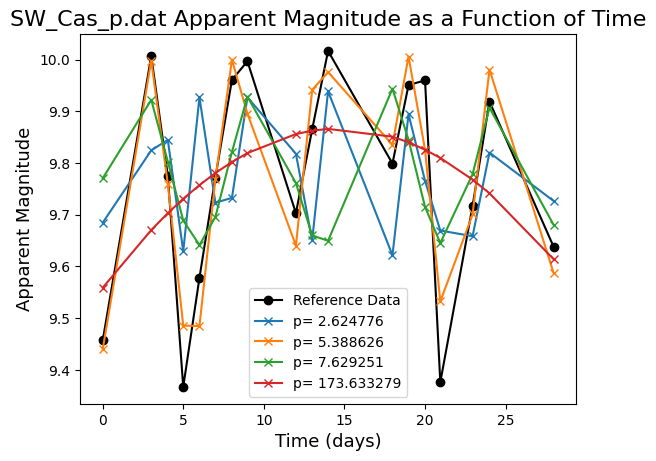

SY_Aur_p.dat, Lowest Chi Value = 0.9099157510709119, Corresponding period that gives the lowest Chi value = 5.818070417490633, Correspondiong apparent visual magnitude = 9.085453151208231


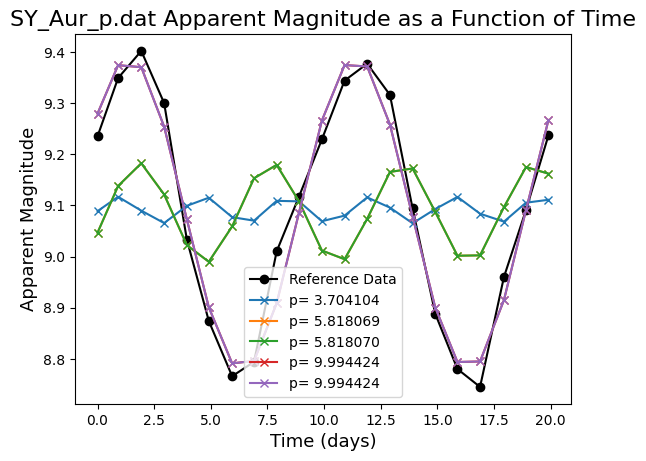

SY_Cas_p.dat, Lowest Chi Value = 2.6798872602422343, Corresponding period that gives the lowest Chi value = 8.302851873178803, Correspondiong apparent visual magnitude = 9.954689447372981


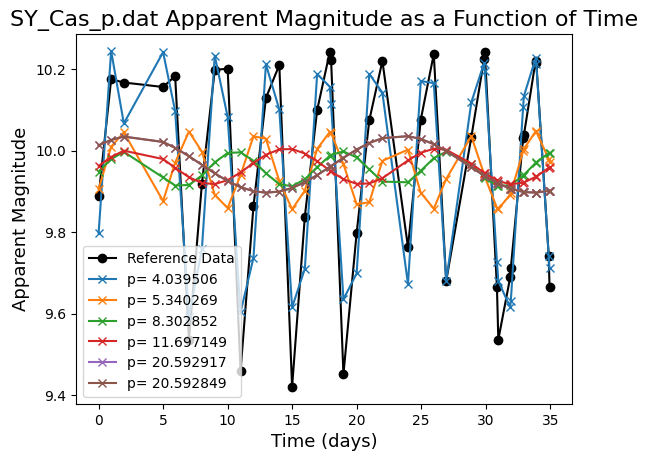

SZ_Aql_p.dat, Lowest Chi Value = 1.6962297011888163, Corresponding period that gives the lowest Chi value = 16.74328022669879, Correspondiong apparent visual magnitude = 8.606422505092826


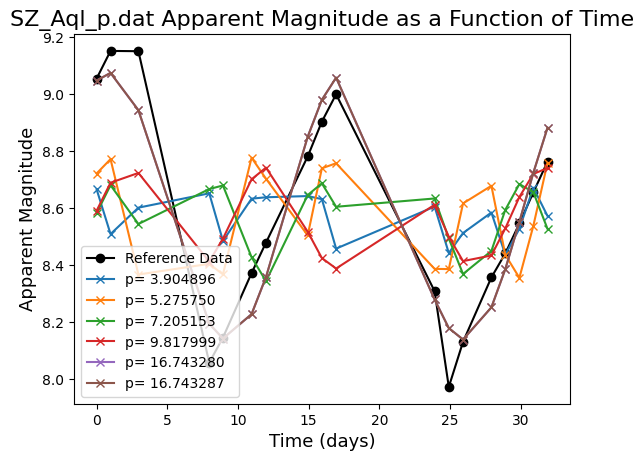

TT_Aql_p.dat, Lowest Chi Value = 2.989026841986246, Corresponding period that gives the lowest Chi value = 13.671446780606862, Correspondiong apparent visual magnitude = 7.168514785375394


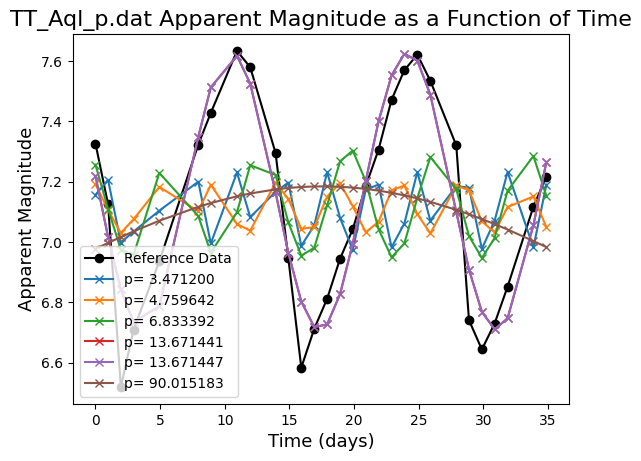

U_Aql_p.dat, Lowest Chi Value = 2.981010612036686, Corresponding period that gives the lowest Chi value = 7.020473086250104, Correspondiong apparent visual magnitude = 6.425292280920071


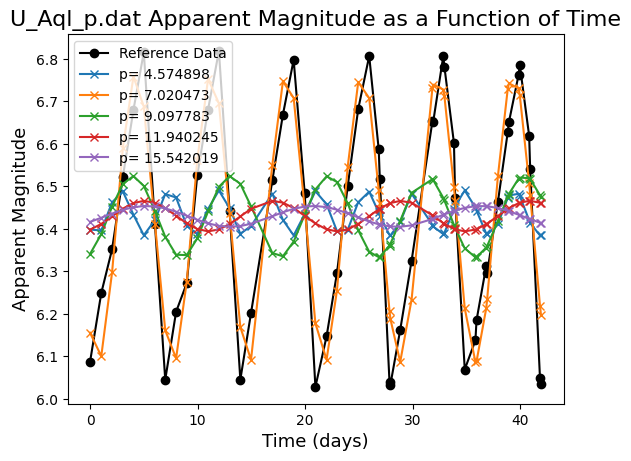

VW_Cas_p.dat, Lowest Chi Value = 1.4181404012915326, Corresponding period that gives the lowest Chi value = 22.744450228858362, Correspondiong apparent visual magnitude = 10.711815001209592


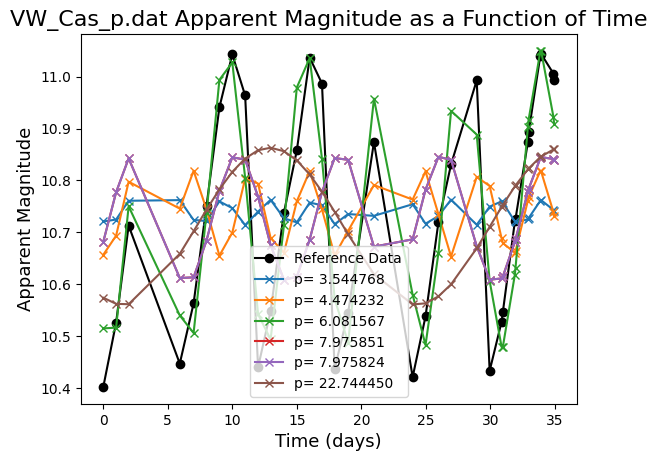

YZ_Aur_p.dat, Lowest Chi Value = 1.768298406681361, Corresponding period that gives the lowest Chi value = 8.15213558658436, Correspondiong apparent visual magnitude = 10.397622897742979


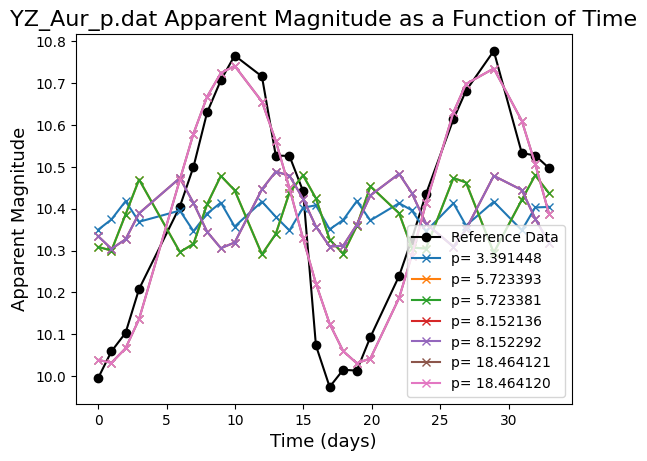

In [7]:
def func(t, m_v, phi,m_v0,P):
    return m_v0+m_v*(np.sin((2*np.pi*t/P) +phi))

chi_values = []
final_chi = []
final_period = []
final_apparent_visual_magnitude = []

for file in file_list:
    filename = path + file
    chilist = []
    fitted_period = []
    apparent_visual_magnitude = []
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    plt.figure()
    
    plt.plot(relative_time, v_mag, 'o-', color = 'black',label = 'Reference Data')
    for i in peaks_periods:
        m_v = (np.max(v_mag)-np.min(v_mag)/2)
        m_v0 = (np.sum(v_mag)/v_mag.size)
        relative_time = (time - time[0])
        popt, _ = scipy.optimize.curve_fit(func, relative_time, v_mag, p0 = [m_v0,m_v,1,i], maxfev = 50000)
        plt.plot(relative_time, func(relative_time, popt[0], popt[1], popt[2], popt[3]), 'x-', label = f'p= {popt[3]:2f}' )
        plt.title(f'{file} Apparent Magnitude as a Function of Time',  fontsize = title_size)
        plt.xlabel('Time (days)', fontsize = axis_size)
        plt.ylabel('Apparent Magnitude', fontsize = axis_size)
        plt.legend()
        chi = np.sum((v_mag-func(relative_time, popt[0], popt[1], popt[2], i))**2)
        chilist.append(chi)
        fitted_period.append(popt[3])
        apparent_visual_magnitude.append(popt[2])
    
    chilist_array = np.array((chilist))
    min_chilist_array = np.min(chilist_array)
    fitted_period_array = np.array(fitted_period)
    apparent_visual_magnitude_array = np.array(apparent_visual_magnitude)
    print(f'{file}, Lowest Chi Value = {np.min(chilist_array)}, Corresponding period that gives the lowest Chi value = {fitted_period_array[np.argmin(chilist_array)]}, Correspondiong apparent visual magnitude = {apparent_visual_magnitude_array[np.argmin(chilist_array)]}')
    final_chi.append(np.min(chilist_array))
    final_period.append(fitted_period_array[np.argmin(chilist_array)])
    final_apparent_visual_magnitude.append(apparent_visual_magnitude_array[np.argmin(chilist_array)])
    plt.show()
    star_data = {'file': file_list,"chi": final_chi, 'period': final_period, 'apparent_visual_magnitude': final_apparent_visual_magnitude}
    


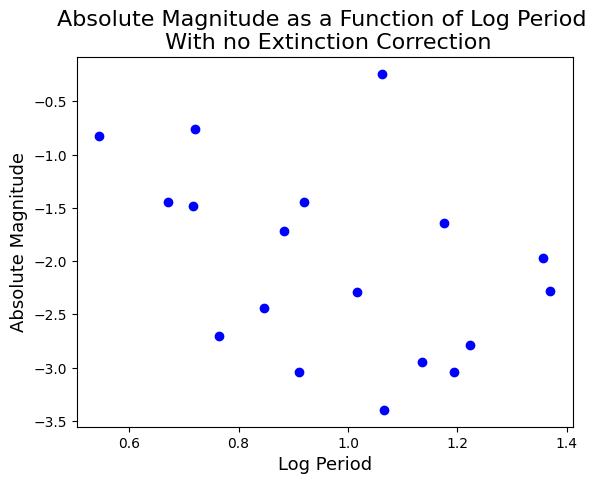

In [8]:
colour_band = np.loadtxt('data_files/colour_band.txt')
distance = np.loadtxt('data_files/distance.txt')
log_per = np.log10(star_data['period'])
M_V = []

for i in range(len(final_apparent_visual_magnitude)):
    abs_mag_vis = final_apparent_visual_magnitude[i] - 5*np.log10(distance[i]) + 5
    M_V.append(abs_mag_vis)

def straight(x, m, c):
    return m*x + c

popt, pcov = scipy.optimize.curve_fit(straight, log_per, M_V, p0 = [-2,-1])
plt.figure()
plt.scatter(log_per, M_V, color = 'blue')
plt.title('Absolute Magnitude as a Function of Log Period \n With no Extinction Correction',  fontsize = title_size)
plt.xlabel('Log Period', fontsize = axis_size)
plt.ylabel('Absolute Magnitude', fontsize = axis_size)
plt.show()

        

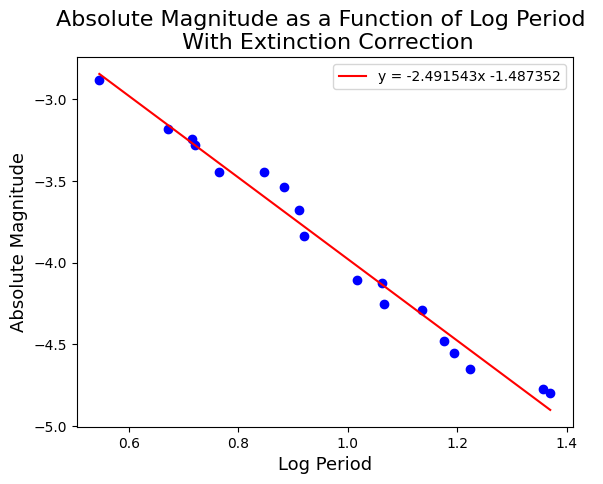

The gradient of the line is -2.491543 and the y-intercept is -1.487352 


In [9]:
M_V2 = []
Av = 3.1*colour_band
log_per = np.log10(star_data['period'])

for i in range(len(final_apparent_visual_magnitude)):
    abs_mag_vis = final_apparent_visual_magnitude[i] - (5*np.log10(distance[i])) + 5 - Av[i]
    M_V2.append(abs_mag_vis)
    
def straight(x, m, c):
    return m*x + c

M_V2_sort = np.sort(M_V2)
log_per_sort = np.sort(log_per)[::-1]

popt, pcov = scipy.optimize.curve_fit(straight, log_per_sort, M_V2_sort, p0 = [-2.5,-1])
curve = straight(log_per_sort, popt[0], popt[1])
plt.figure()
plt.scatter(log_per_sort, M_V2_sort, color = 'blue')
plt.title('Absolute Magnitude as a Function of Log Period \n With Extinction Correction',  fontsize = title_size)
plt.xlabel('Log Period', fontsize = axis_size)
plt.ylabel('Absolute Magnitude', fontsize = axis_size)
plt.plot(log_per_sort, curve, '-', color = 'red', label = f'y = {popt[0]:2f}x {popt[1]:2f}')
plt.legend()
plt.show()
print(f'The gradient of the line is {popt[0]:2f} and the y-intercept is {popt[1]:2f} ')



In [10]:
print(M_V)

[-2.2891282558051174, -1.6401252637220747, -3.0427775082460276, -1.4417475892023095, -1.4827947666816783, -0.24206195141318076, -0.7620295776748947, -0.8269828320441235, -3.396170228647005, -2.2800928940508065, -1.712349690295694, -2.7013620018674835, -1.4447854526852097, -2.785058535363543, -2.947747512793163, -2.4436399439858976, -1.9728701123137764, -3.042695586988744]


In [13]:
print(np.sort(log_per))

[0.54583468 0.67136551 0.71603757 0.72038107 0.76477897 0.84636638
 0.88248188 0.91127139 0.91922729 1.01612703 1.06175126 1.06571166
 1.13581448 1.17634245 1.19441352 1.22384055 1.35687544 1.36987981]


In [11]:
#extra stuff
        
        #chi = np.sum((v_mag-func(relative_time, popt[0], popt[1], popt[2], i))**2)
        
        #print(chi)
        #chi_values.append(chi)
    

        # if chi < chi_test:
        #     chi_test = chi
        #     print( chi_test)
        #     print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi_test)
            #print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi)
        
    #plt.show()
    #plt.legend(['Ex Data', ])
    #plt.plot(time,func(time,popt[0],popt[1],popt[2],i))
        #for j in popt:
         #   sp.stats.chisquare((v_mag),func(time,popt[0],popt[1],popt[2],j))
        #  print(np.min(j))
        





         # if chi < chi_test:
        #     chi_test = chi
            
        #     print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi_test)
        #     #print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi)
        
        # mins = []
        # for j in chi_values:
        #     mins.append(np.min(j))
        #     #print(chi_values.index([j[np.min[j]]]))
            
    # chi_values.append(chilist) 